### CAS KAGGLE

#### Introducció

Guia 

1- introducció / llegir base de dades
2- data cleaning / preprocessament (tractar els nans, tractar els outliers)
3- Exploration data analisiy 

Per realitzar el nostre cas Kaggle hem triat el dataset airbnb de la ciutat de Nova York. Aquest dataset descriu la llista d'activitats i mètriques dels airbnb a la ciutat de New York al 2019. 

Es tracta d'un problema de regressió, el target serà predir el preu per nit del AirBnb.



In [2]:
#importem llibreries
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

### 1. Exploratory Data Analysis

##### Anàl·lisis descriptiu



Primer de tot llegim el dataset. És molt important veure les dades i examinar-les juntament amb els atributs del nostre dataset per entrendre-ls així serà més fàcil per preparar les dades per futurs anàl·lisis.  

In [3]:
df = pd.read_csv('dataset/AB_NYC_2019.csv')

print(f'El nombre de mostres son: {df.shape[0]}')
print(f"El nombre d'atributs son: {df.shape[1]}")

print(df.dtypes)

df.head



El nombre de mostres son: 48895
El nombre d'atributs son: 16
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


<bound method NDFrame.head of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

         

Com podem veur el nostre dataset té 48895 mostres, és a dir files. I després té 16 atributs. El target serà l'atribut price.

#### Descripció dels atributs: 
- id: identificador 
- name: nom de l'anunci
- host_id: id del host 
- neighbourhood_group: localització
- neighbourhood: barri 
- latitude: latitud
- longitude: longitud
- room_type: tipus d'apartament 
- price: preu en dolars (target)
- number_of_reviews: número de reviews
- last_review: data de l'ultima ressenya
- calculated_host_listings_count: número de apartamentos que tiene el anfitrion
- availability_365: número de dias que está disponible para reservar 



In [4]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
10%    3.496066e+06  2.027013e+06     40.667990    -73.996690     49.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
90%    3.399094e+07  2.128114e+08     40.804890    -73.907810    269.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
10%          1.000000           0.000000           0.060000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
90%         28.000000          70.000000           3.630000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
10%                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
90%                          5.000000        337.000000  
max                        327.000000        365.000000

Podem veure que la mitjana de preus és de 152.74 $ per nit. La mitajana de número de nits és 7. També sorprén que la mínima 'availability_365' és de 0, és a dir que no hi ha disponibilitat en cap dia del any. 

Eliminem files on el preu sigui 0 i la disponibilitat sigui 0 també ja que no té sentit i podria fer que el rendiment del nostre model empitjores. Son molt poques files per tant, les eliminem. 

In [5]:
df = df[(df['price'] != 0) | (df['availability_365'] != 0)]
df.shape

(48892, 16)

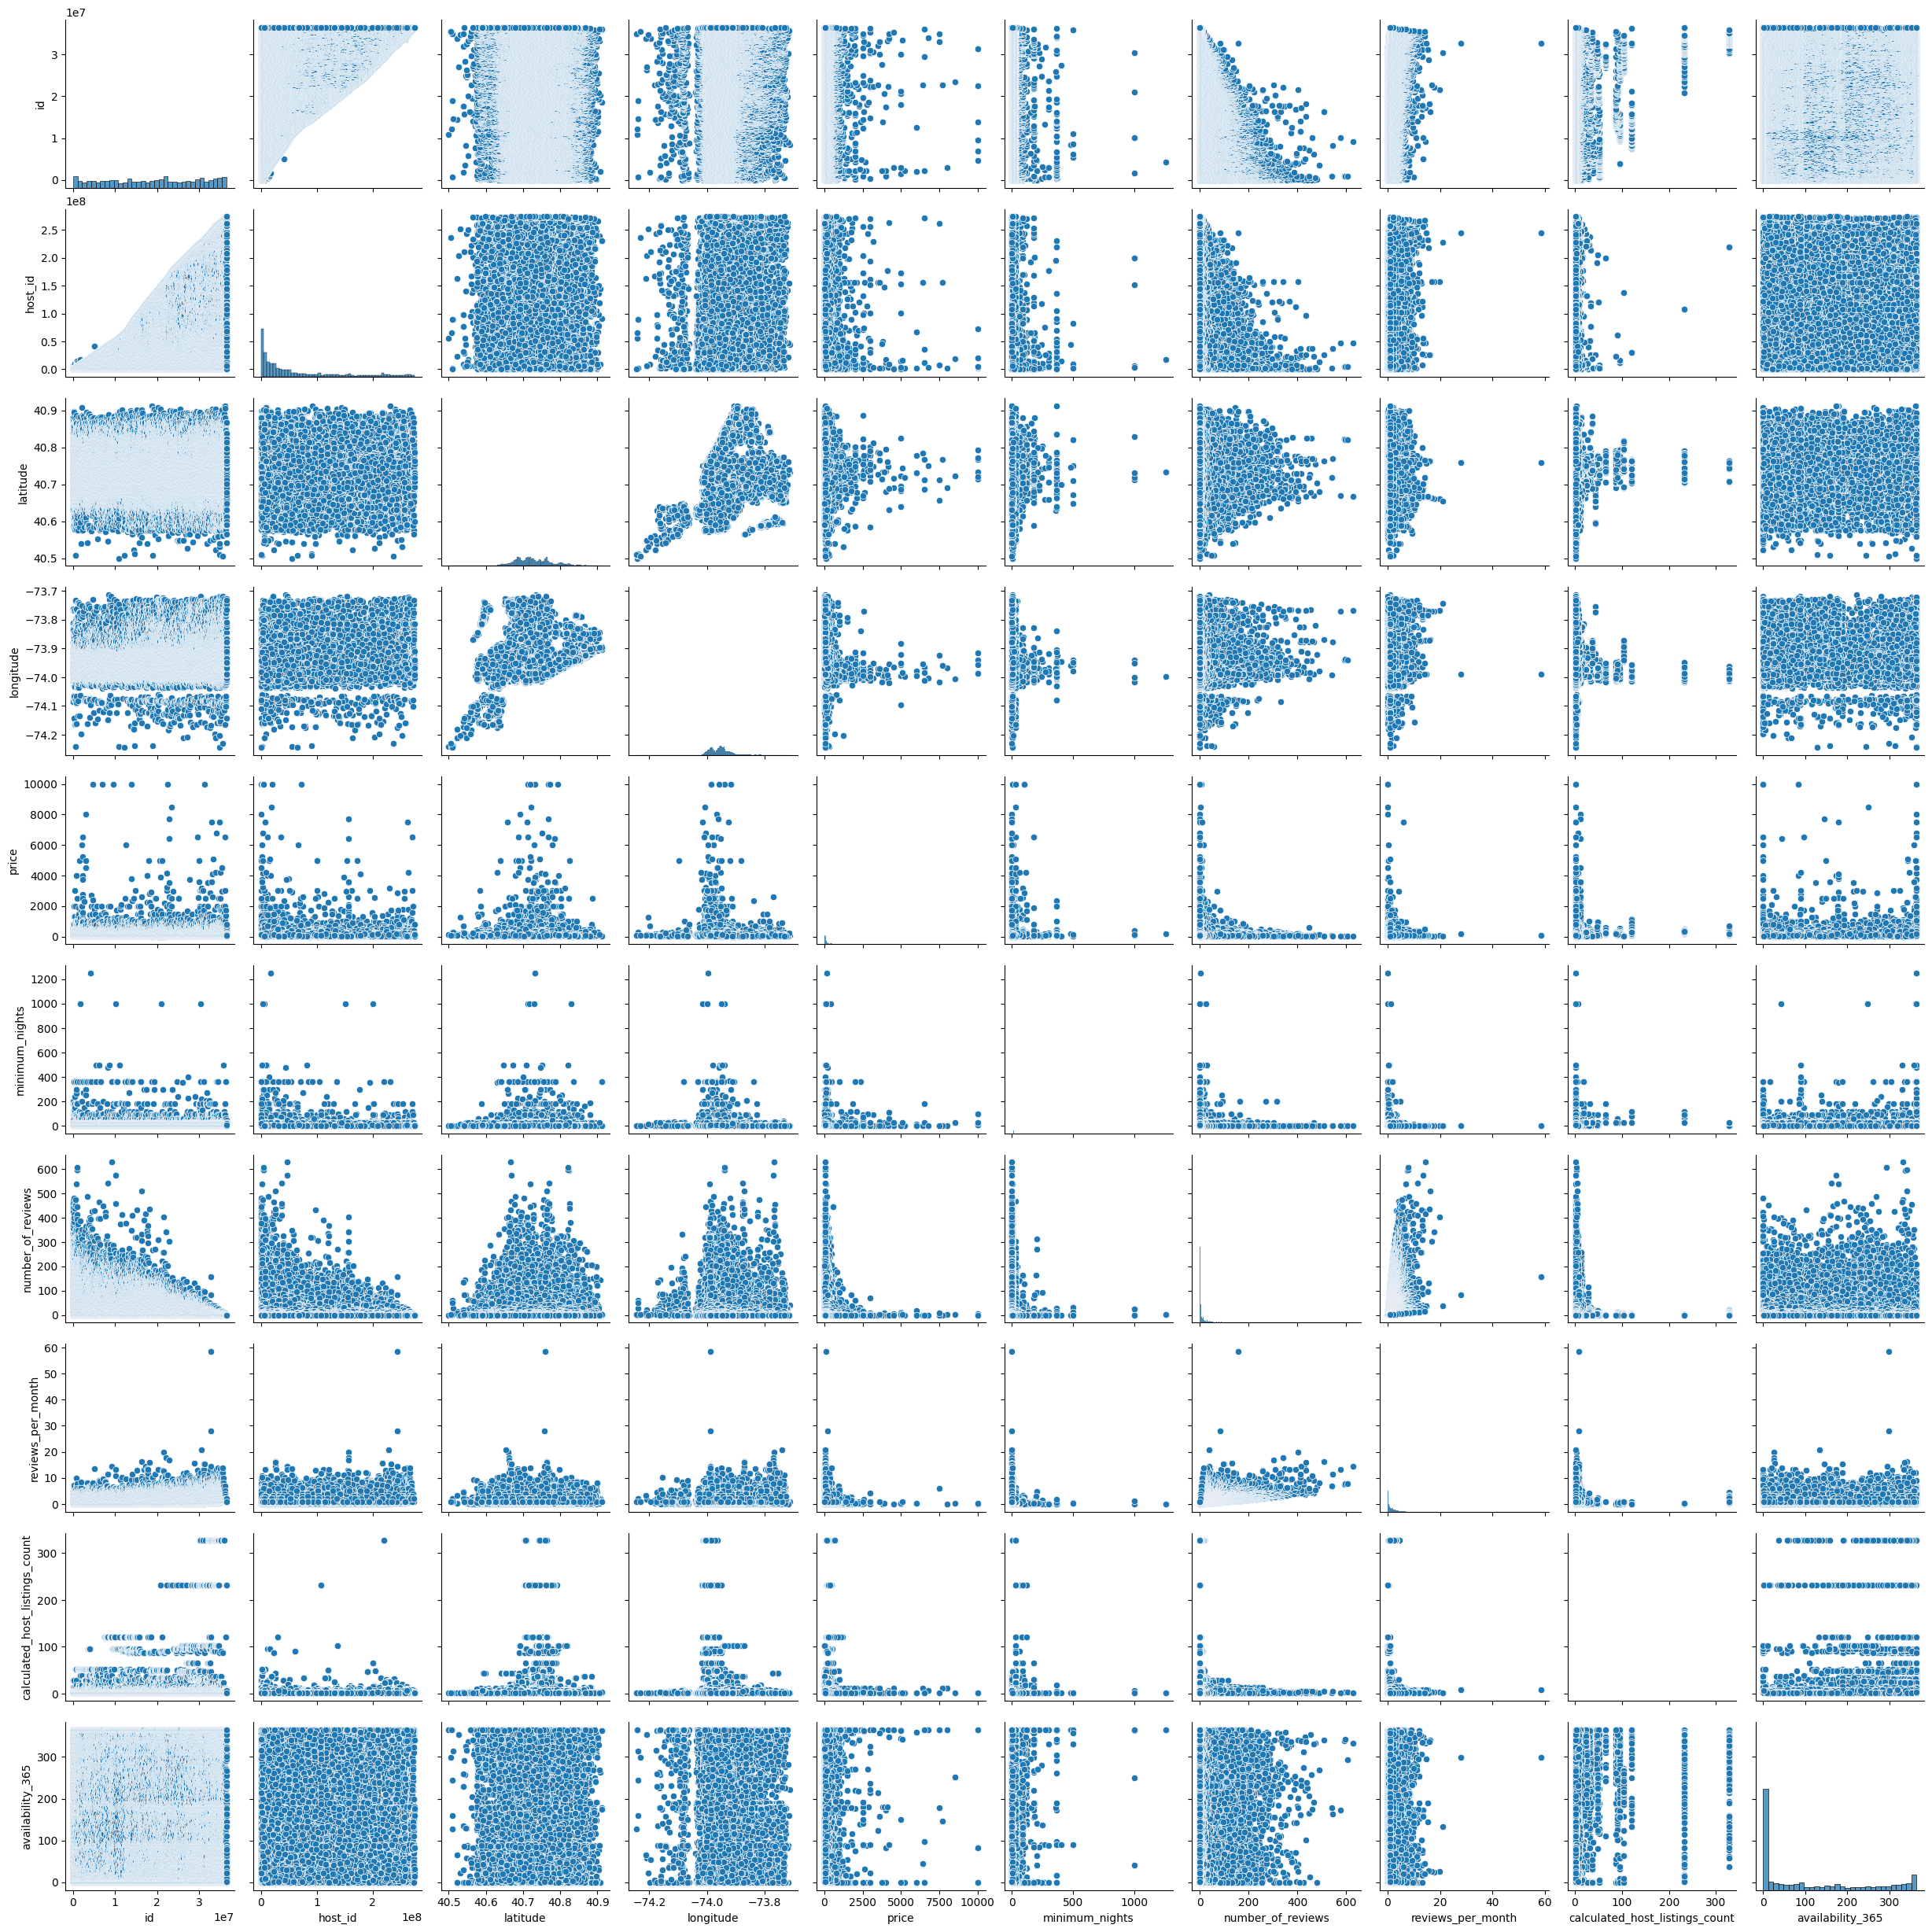

In [6]:
#### Basic plotting and visualization on the data set
sns.pairplot(df)
plt.show()

Anem  a veure la distribució de l'atribut target 

<Axes: ylabel='Density'>

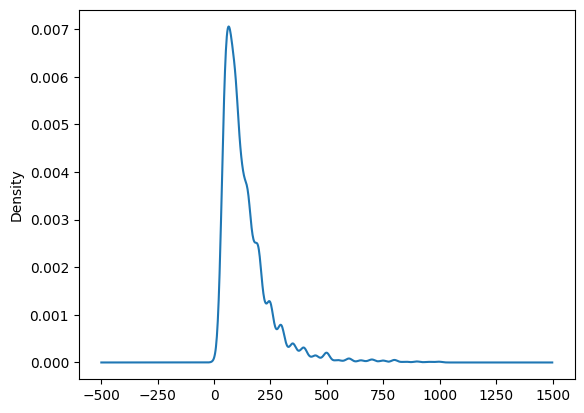

In [7]:
df[df['price'] < 1000]['price'].plot.density()

Text(0, 0.5, 'Nº AirBnb')

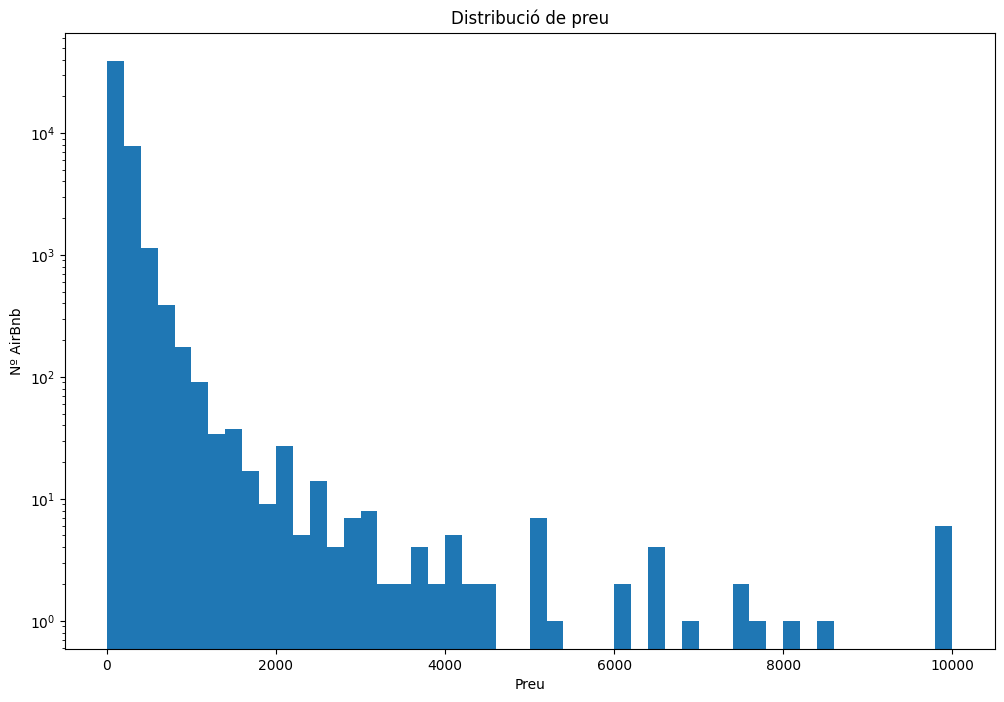

In [8]:
# Distribució del preu d'alquiler 
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(df['price'], bins=50, log=True)
ax.set_title('Distribució de preu')
ax.set_xlabel('Preu')
ax.set_ylabel('Nº AirBnb')

#### Preprocessament i Data Cleaning 

##### Mirem si conté valors nuls

In [9]:
#numero de valores nulos en el dataset 
num_valors_null = df.isnull().sum()
percentatge_null = df.isnull().sum()/df.size

#percentatge valors nuls, per entendre millor 
print(percentatge_null)

#llistem els valors nuls
columna_null = df.columns[df.isnull().any()].to_list()
print(columna_null)


id                                0.000000
name                              0.000020
host_id                           0.000000
host_name                         0.000027
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.012848
reviews_per_month                 0.012848
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64
['name', 'host_name', 'last_review', 'reviews_per_month']


In [10]:
# número de valors nulls 
for valor in columna_null:
    print(df[valor].isnull().value_counts())

name
False    48876
True        16
Name: count, dtype: int64
host_name
False    48871
True        21
Name: count, dtype: int64
last_review
False    38841
True     10051
Name: count, dtype: int64
reviews_per_month
False    38841
True     10051
Name: count, dtype: int64


#### Remplaçament de valors nuls 

Les columnes 'name', 'host_name' tenen molt pocs nans. Per tant, la manera més fácil i sense afectar al model és eliminant les files que contenen els nans.  

Podem observar, que last_review i reviews_per_month estan connectats un amb l'altre. Els valors que falten representen que no s'ha deixat una ressenya per aquella anunci AirBnb. Basicament si no hi ha la data de ressenya tampoc estará el camp reviews_per_month (és un percentatge).
 - Les reviews_per_month replacarem els nans per una puntuació de 0.0, que indicarà que no hi ha ressenya.
 - La last_reviews_per_month per una data simbolica que sera l'última data possible '2019-12-31' 

In [11]:
#eliminem files amb nans 'name'
df.dropna(subset=['name'], inplace=True)

#eliminem files amb nans 'host_name'
df.dropna(subset=['host_name'], inplace=True)


C:\Users\eferr\AppData\Local\Temp\ipykernel_10700\3799080906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['name'], inplace=True)
C:\Users\eferr\AppData\Local\Temp\ipykernel_10700\3799080906.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['host_name'], inplace=True)


In [12]:
#omplim reviews_per_month
df['reviews_per_month'] = df['reviews_per_month'].fillna(0.0)

#omplim last_reviews_per_month
df['last_review'] = df['last_review'].fillna("2019-12-31")

C:\Users\eferr\AppData\Local\Temp\ipykernel_10700\3479839438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews_per_month'] = df['reviews_per_month'].fillna(0.0)
C:\Users\eferr\AppData\Local\Temp\ipykernel_10700\3479839438.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_review'] = df['last_review'].fillna("2019-12-31")


In [13]:
df.isnull().sum()/df.size

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

Podem veure com no queda cap nan.

##### Data Cleaning

Anem a eliminar els atributs que pel nostre model no són rellevants per calcular el target. També eliminant atributs redueix la possibilitat de overfitting. Els atributs a eliminar serán els seguents. 




In [14]:

df_new = df.drop(['name','host_name','last_review','id','host_id','number_of_reviews', 'last_review'],axis=1)
df_new.dtypes

neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Per entendre millor realitzarem unes gràfiques per tal de visualitzar els atributs i fer-nos una idea. 

Mostrem la localització dels airbnb per barris

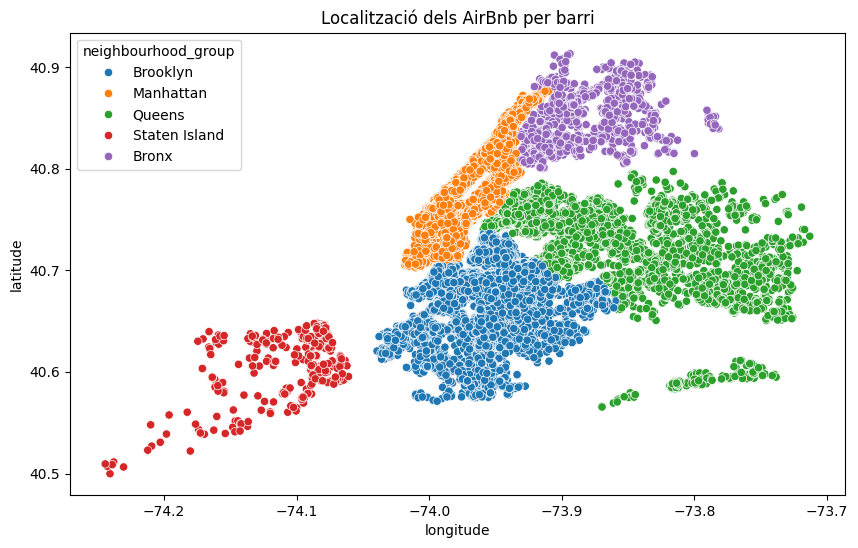

In [15]:
#farem un gràfic de punts 

title = 'Localització dels AirBnb per barri'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df).set_title(title)
plt.show()

Mirem districtes on hi ha més apartaments 


In [16]:
df.groupby(['neighbourhood_group','neighbourhood'])['neighbourhood'].count().reset_index(name='apt. count').sort_values('apt. count',ascending=False).head(10)


neighbourhood_group       neighbourhood  apt. count
93             Brooklyn        Williamsburg        3917
50             Brooklyn  Bedford-Stuyvesant        3713
105           Manhattan              Harlem        2655
58             Brooklyn            Bushwick        2461
124           Manhattan     Upper West Side        1969
106           Manhattan      Hell's Kitchen        1954
100           Manhattan        East Village        1852
123           Manhattan     Upper East Side        1797
65             Brooklyn       Crown Heights        1563
112           Manhattan             Midtown        1545

Distribució dels airbnb per barris i districtes

C:\Users\eferr\AppData\Local\Temp\ipykernel_10700\1253079244.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=neighbourhood_group,x='neighbourhood_group',y='count',ax=ax1, palette=color)
C:\Users\eferr\AppData\Local\Temp\ipykernel_10700\1253079244.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=neighbourhood.head(10),x='neighbourhood',y='count',ax=ax2, palette=color)
C:\Users\eferr\AppData\Local\Temp\ipykernel_10700\1253079244.py:12: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax2 = sns.barplot(data=neighbourhood.head(10),x='neighbourhood',y='count',ax=ax2, palette=color)
C:\

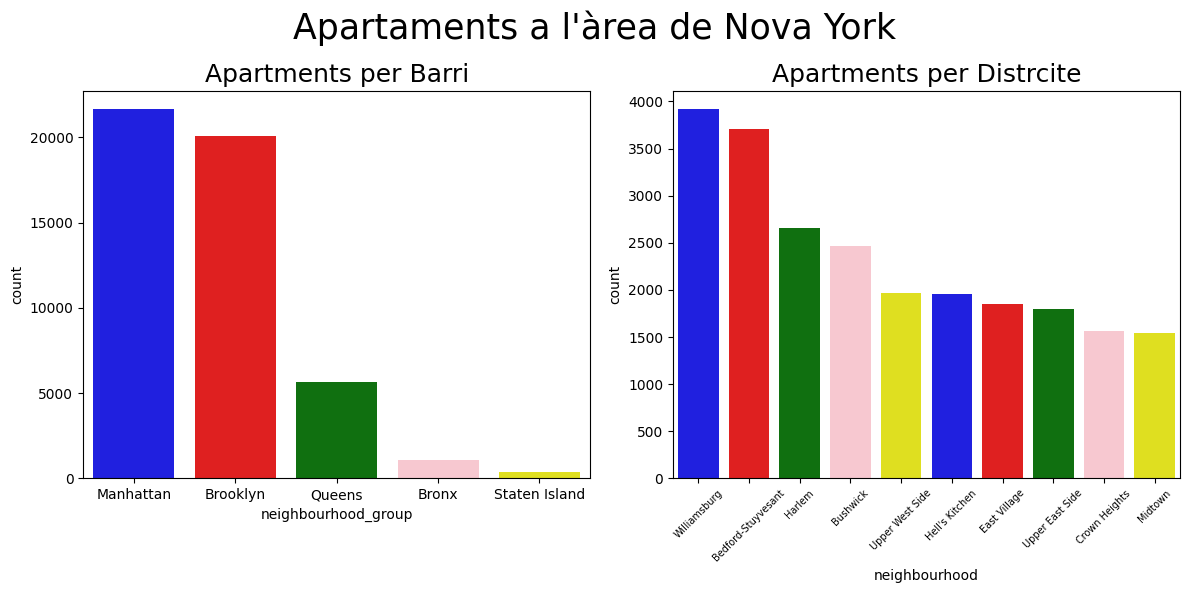

In [17]:
neighbourhood_group = df.groupby('neighbourhood_group')['neighbourhood_group'].count().reset_index(name='count').sort_values('count',ascending=False)

neighbourhood = df.groupby('neighbourhood')['neighbourhood'].count().reset_index(name='count').sort_values('count',ascending=False)

color = ['blue','red','green','pink','yellow']

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))

ax1 = sns.barplot(data=neighbourhood_group,x='neighbourhood_group',y='count',ax=ax1, palette=color)
ax1.set_title('Apartments per Barri',size=18)

ax2 = sns.barplot(data=neighbourhood.head(10),x='neighbourhood',y='count',ax=ax2, palette=color)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45,fontsize=7)
ax2.set_title('Apartments per Distrcite',size=18)

plt.suptitle("Apartaments a l'àrea de Nova York",size=25)

plt.tight_layout()

Distribució del tipus d'habitació i tipus d'habitació per barri  

C:\Users\eferr\AppData\Local\Temp\ipykernel_10700\3111150042.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=df, palette=['red','yellow','green'])


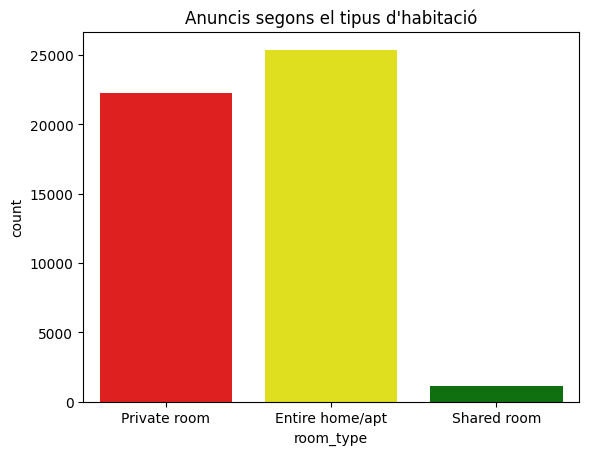

room_type
Entire home/apt    25392
Private room       22304
Shared room         1159
Name: count, dtype: int64


In [18]:
#preu dels anuncis segons tipus d'habitació 
title = "Anuncis segons el tipus d'habitació"
sns.countplot(x='room_type', data=df, palette=['red','yellow','green'])
plt.title(title)
plt.show()

print(df['room_type'].value_counts())

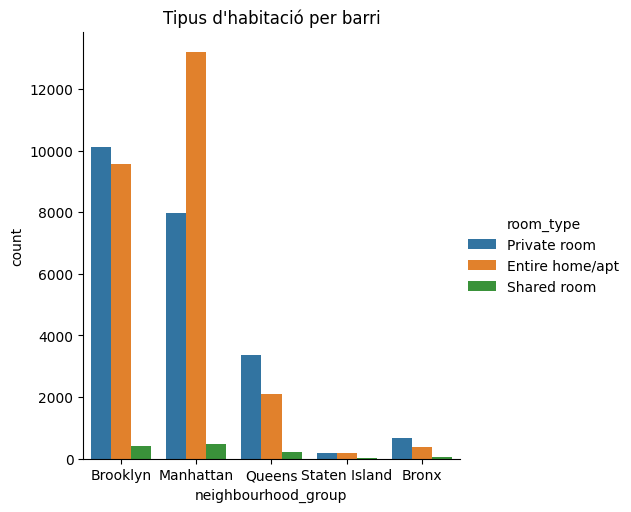

In [19]:
#classificació dels anuncis segons tipus d'habitació i barri 
title = "Tipus d'habitació per barri"
sns.catplot(x='neighbourhood_group', kind="count", hue="room_type", data=df)
plt.title(title)
plt.show()

Ara transformarem els atributs objectes en atributs numèrics ja que el l'entrenament del model només accepta atributs numèrics. Farem un label encoder dels atributs neighbourhood, neighbourhood_group
                    

In [20]:
from sklearn.preprocessing import LabelEncoder

#guardem els valors per després poder fer gàfiques
room_type_obj = df['room_type']

neighbourhood_obj = ['neighbourhood']


label_encoder = LabelEncoder()
df_new['neighbourhood'] = label_encoder.fit_transform(df_new['neighbourhood'])

label_encoder = LabelEncoder()
df_new['neighbourhood_group'] = label_encoder.fit_transform(df_new['neighbourhood_group'])

label_encoder = LabelEncoder()
df_new['room_type'] = label_encoder.fit_transform(df_new['room_type'])


print(df_new.dtypes)

neighbourhood_group                 int32
neighbourhood                       int32
latitude                          float64
longitude                         float64
room_type                           int32
price                               int64
minimum_nights                      int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


CONCLUSIONS: 

Veiem la matriu de correlació entre les variables per veure quina relació hi ha entre les variables amb el target

In [21]:
df_new.corr()

neighbourhood_group  neighbourhood  latitude  \
neighbourhood_group                        1.000000       0.111263  0.279616   
neighbourhood                              0.111263       1.000000  0.234741   
latitude                                   0.279616       0.234741  1.000000   
longitude                                  0.101323      -0.102488  0.084832   
room_type                                 -0.016239      -0.071947  0.006291   
price                                      0.044171       0.062043  0.033941   
minimum_nights                             0.017390       0.028148  0.025891   
reviews_per_month                          0.052968      -0.051831 -0.018700   
calculated_host_listings_count             0.073668       0.010309  0.019548   
availability_365                           0.080605      -0.034458 -0.010781   

                                longitude  room_type     price  \
neighbourhood_group              0.101323  -0.016239  0.044171   
neighbourhood                   -0.102488  -0.071947  0.062043   
latitude                         0.084832   0.006291  0.033941   
longitude                        1.000000   0.184196 -0.149953   
room_type                        0.184196   1.000000 -0.249282   
price                           -0.149953  -0.249282  1.000000   
minimum_nights                  -0.062891  -0.070542  0.042795   
reviews_per_month                0.138759   0.026636 -0.050603   
calculated_host_listings_count  -0.114747  -0.106076  0.057455   
availability_365                 0.082762   0.022644  0.081786   

                                minimum_nights  reviews_per_month  \
neighbourhood_group                   0.017390           0.052968   
neighbourhood                         0.028148          -0.051831   
latitude                              0.025891          -0.018700   
longitude                            -0.062891           0.138759   
room_type                            -0.070542           0.026636   
price                                 0.042795          -0.050603   
minimum_nights                        1.000000          -0.127385   
reviews_per_month                    -0.127385           1.000000   
calculated_host_listings_count        0.131311          -0.047370   
availability_365                      0.145945           0.163734   

                                calculated_host_listings_count  \
neighbourhood_group                                   0.073668   
neighbourhood                                         0.010309   
latitude                                              0.019548   
longitude                                            -0.114747   
room_type                                            -0.106076   
price                                                 0.057455   
minimum_nights                                        0.131311   
reviews_per_month                                    -0.047370   
calculated_host_listings_count                        1.000000   
availability_365                                      0.225782   

                                availability_365  
neighbourhood_group                     0.080605  
neighbourhood                          -0.034458  
latitude                               -0.010781  
longitude                               0.082762  
room_type                               0.022644  
price                                   0.081786  
minimum_nights                          0.145945  
reviews_per_month                       0.163734  
calculated_host_listings_count          0.225782  
availability_365                        1.000000

<Axes: >

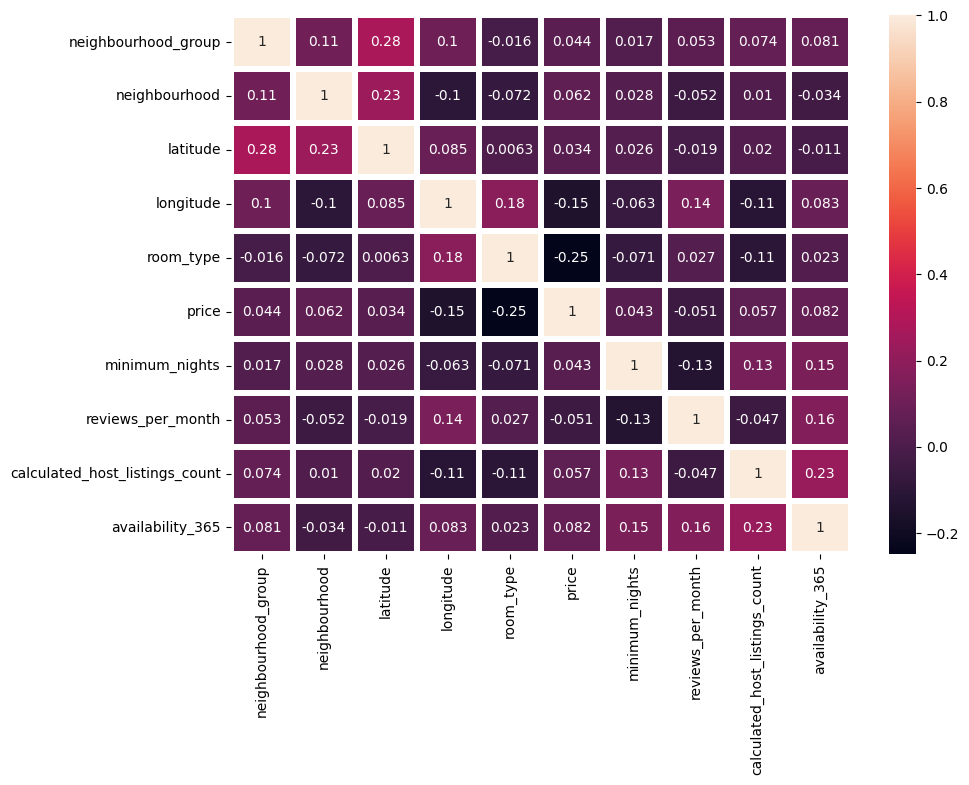

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(df_new.corr(),annot=True,linewidths=3)

In [23]:
def calcular_correlacio(data, target_column='target'):
    data_temp = data.copy()
    if data_temp[target_column].dtype == 'object':
        data_temp[target_column] = data_temp[target_column].map({'+': 1, '-': 0})
    le = LabelEncoder()
    for column in data_temp.columns:
        if data_temp[column].dtype == 'object' and column != target_column:
            data_temp[column] = le.fit_transform(data_temp[column])
    correlacions = data_temp.corr()[target_column]
    correlacions = correlacions.drop(target_column)
    return correlacions

correlacions = calcular_correlacio(df_new, target_column='price')
print(correlacions)

neighbourhood_group               0.044171
neighbourhood                     0.062043
latitude                          0.033941
longitude                        -0.149953
room_type                        -0.249282
minimum_nights                    0.042795
reviews_per_month                -0.050603
calculated_host_listings_count    0.057455
availability_365                  0.081786
Name: price, dtype: float64


C:\Users\eferr\AppData\Local\Temp\ipykernel_10700\932308209.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacions.index, y=correlacions.values,  palette='viridis')


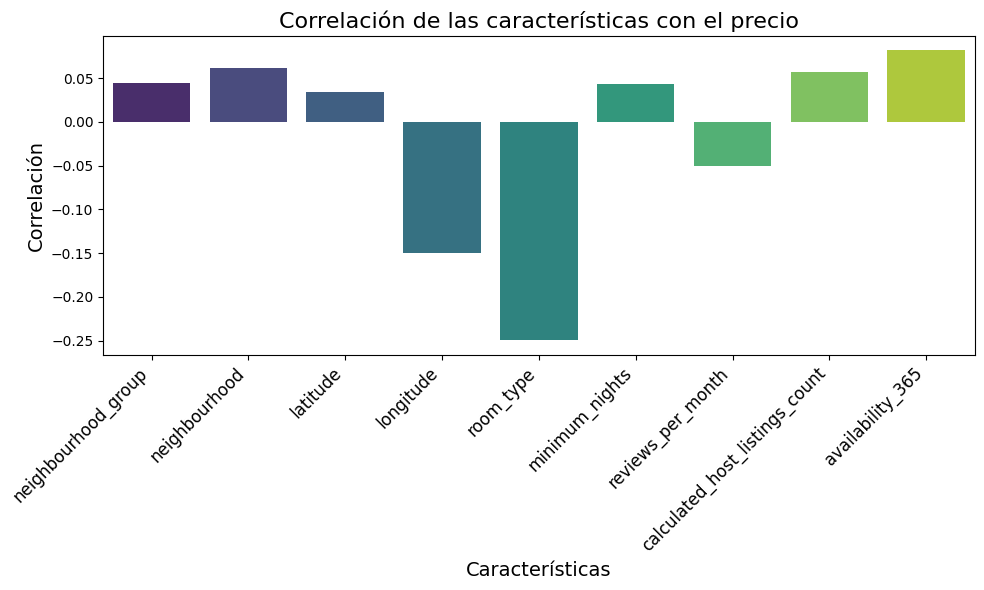

In [24]:
# Crear un gráfico de barras para visualizar las correlaciones
plt.figure(figsize=(10, 6))
sns.barplot(x=correlacions.index, y=correlacions.values,  palette='viridis')

# Añadir títulos y etiquetas
plt.title('Correlación de las características con el precio', fontsize=16)
plt.xlabel('Características', fontsize=14)
plt.ylabel('Correlación', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### Visualitation

A partir de la matriu de correlació anem a extreure i graficar aquelles categories que més estan relacionades. 

Un cop vist la matriu de correlació de l'atribut target anem a analitzar el preu (que és l'atribut target) amb aquells atributs que tenen major correlació.

Fem distribució de preus per barris 

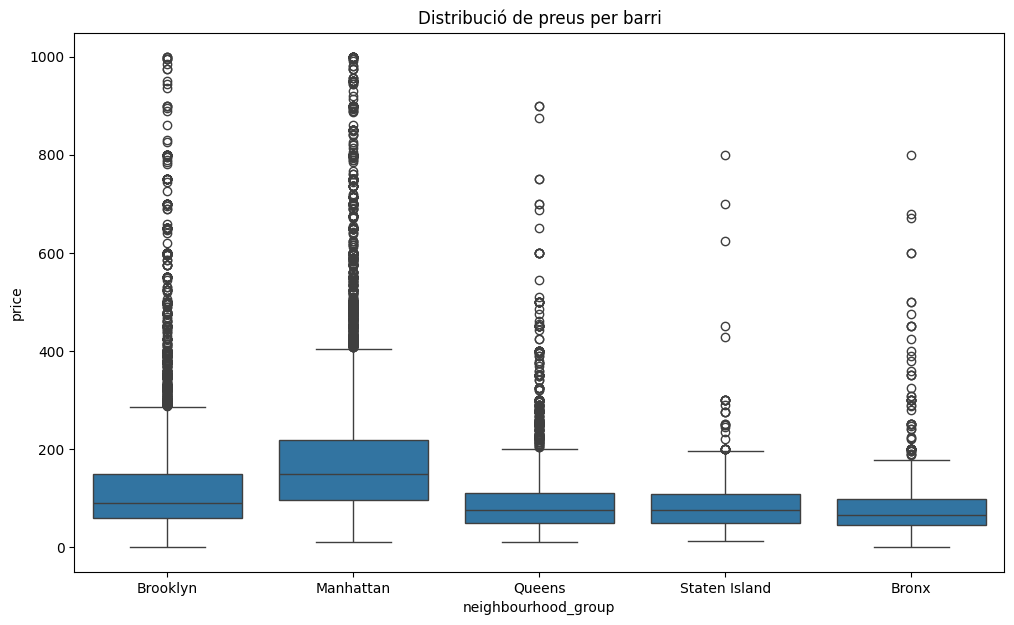

In [25]:
#fem gràfic de caixa per veure millors la distribució i també veure els valors que destaquen 
#gràfic de preu per cada barri per veure com es distribueixen

plt.figure(figsize=(12, 7))
sns.boxplot(x='neighbourhood_group', y='price', data=df[df['price'] < 1000])
plt.title("Distribució de preus per barri")
plt.show()

Anem a veure la correlació del 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


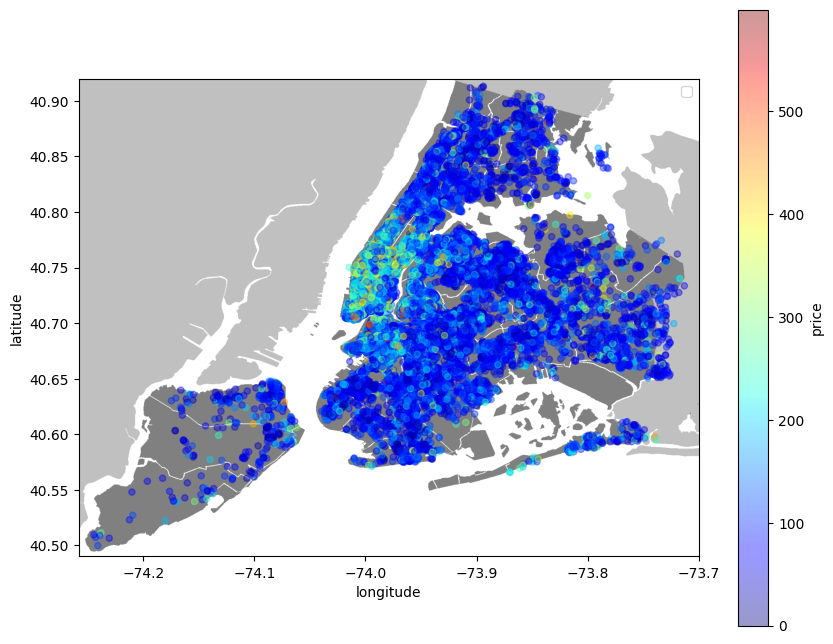

In [26]:
import urllib
from PIL import Image
import matplotlib.pyplot as plt

# Filtrar los datos
sub_6 = df[df.price < 600]

# Inicializar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Cargar la imagen desde la URL usando PIL
url = 'https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'
with urllib.request.urlopen(url) as i:
    nyc_img = Image.open(i)

# Mostrar la imagen como fondo, ajustando las coordenadas
plt.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])

# Obtener el eje actual
ax = plt.gca()

# Graficar el scatterplot
sub_6.plot(
    kind='scatter', 
    x='longitude', 
    y='latitude', 
    c='price', 
    ax=ax, 
    cmap=plt.get_cmap('jet'), 
    colorbar=True, 
    alpha=0.4, 
    zorder=5
)

# Mostrar la leyenda y la gráfica
plt.legend()
plt.show()

Relació de preus segons tipus d'habitació 

### ENTRENAMENT I EVALUACIÓ DEL MODEL

In [27]:
X = df_new.drop(columns=["price"])
y = df_new["price"]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

Normalitzem les dades

In [29]:
from sklearn.preprocessing import StandardScaler

#scalerX = StandardScaler().fit(X_train)
#scalery = StandardScaler().fit(y_train)

#X_train = scalerX.transform(X_train)
#y_train = scalery.transform(y_train)
#X_test = scalerX.transform(X_test)
#y_test = scalery.transform(y_test)

#print (np.max(X_train), np.min(X_train), np.mean(X_train), np.max(y_train), np.min(y_train), np.mean(y_train))


sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

scy = StandardScaler()

y_train = np.asarray(y_train)
y_train = y_train.reshape(-1,1)
y_train = scy.fit_transform(y_train)

y_test = np.asarray(y_test)
y_test = y_test.reshape(-1,1)
y_test = scy.fit_transform(y_test)
                                                  

#print (np.max(X_train), np.min(X_train), np.mean(X_train), np.max(y_train), np.min(y_train), np.mean(y_train))


In [30]:
from sklearn.model_selection import *

def train_and_evaluate(clf, X_train, y_train):
    
    clf.fit(X_train, y_train)
    
    print ("Coefficient of determination on training set:",clf.score(X_train, y_train))
    
    # create a k-fold croos validation iterator of k=5 folds
    cv = KFold(5, shuffle=True, random_state=33)
    scores = cross_val_score(clf, X_train, y_train, cv=cv)
    print ("Average coefficient of determination using 5-fold crossvalidation:",np.mean(scores))

In [31]:
from sklearn import linear_model

clf_sgd = linear_model.SGDRegressor(loss='squared_error', penalty=None,  random_state=42)

train_and_evaluate(clf_sgd,X_train,y_train)

print (clf_sgd.coef_)

C:\Users\eferr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eferr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eferr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

Coefficient of determination on training set: 0.08476517628734781
Average coefficient of determination using 5-fold crossvalidation: 0.08969297949009156
[ 0.03871648  0.01895109  0.02417519 -0.10477655 -0.21622647  0.06450521
 -0.05462255 -0.01591556  0.12212205]


Amb un model lineal només expliquem el 8% de les dades, anem a probar amb una regressió més complexa, ja que la lineal sembla no ser suficient

Regressió polinómica

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [33]:
# Crear términos polinómicos (grado 2, se puede ajustar según lo necesites)

for degree in range(2, 4):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Ajustar un modelo de regresión lineal a los datos polinómicos
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predicciones
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Evaluación del modelo
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    print(f"Degree: {degree}")
    print(f"R² en entrenamiento: {train_r2}")
    print(f"R² en prueba: {test_r2}")
    print(f"MSE en entrenamiento: {train_mse}")
    print(f"MSE en prueba: {test_mse}")
    print("\n")

'''
# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Datos reales")
plt.scatter(X_train, y_train_pred, color="red", label="Predicción (entrenamiento)")
plt.scatter(X_test, y_test_pred, color="green", label="Predicción (prueba)")
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"Regresión Polinomial (grado {degree})")
plt.legend()
plt.show()
'''

Degree: 2
R² en entrenamiento: 0.11645017148676695
R² en prueba: 0.10205276051735124
MSE en entrenamiento: 0.883549828513233
MSE en prueba: 0.8979472394826488


Degree: 3
R² en entrenamiento: 0.14179191479834674
R² en prueba: 0.11487794978499566
MSE en entrenamiento: 0.8582080852016533
MSE en prueba: 0.8851220502150043




'\n# Visualización\nplt.figure(figsize=(10, 6))\nplt.scatter(X, y, color="blue", label="Datos reales")\nplt.scatter(X_train, y_train_pred, color="red", label="Predicción (entrenamiento)")\nplt.scatter(X_test, y_test_pred, color="green", label="Predicción (prueba)")\nplt.xlabel("X")\nplt.ylabel("y")\nplt.title(f"Regresión Polinomial (grado {degree})")\nplt.legend()\nplt.show()\n'

Añadimos regularización con Ridge

In [34]:
from sklearn.linear_model import Ridge

# Modelo con regularización L2 (Ridge)
ridge_model = Ridge(alpha=1.0)  # Ajusta alpha según sea necesario
ridge_model.fit(X_train_poly, y_train)

# Evaluar
train_r2 = ridge_model.score(X_train_poly, y_train)
test_r2 = ridge_model.score(X_test_poly, y_test)
print(f"R² en entrenamiento: {train_r2}")
print(f"R² en prueba: {test_r2}")

R² en entrenamiento: 0.14179155869223992
R² en prueba: 0.11494611048041137


Probamos con randomforest

In [35]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train.ravel())

# Evaluar
train_r2 = rf_model.score(X_train, y_train)
test_r2 = rf_model.score(X_test, y_test)
print(f"R² en entrenamiento: {train_r2}")
print(f"R² en prueba: {test_r2}")

R² en entrenamiento: 0.8763527511927286
R² en prueba: 0.10781181858149691
